In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium import plugins

In [4]:
df_crashes = pd.read_csv("../crashes.sample2020.csv")
df_people  = pd.read_csv("people.sample.csv")
df_vehicle = pd.read_csv("vehicles.sample.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'people.sample.csv'

In [5]:
#df_crashes.info()

In [6]:
df_crashes.isnull().sum()

CRASH_RECORD_ID                      0
RD_NO                              387
CRASH_DATE_EST_I                 31071
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         22412
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                        935
CRASH_TYPE                           0
INTERSECTION_RELATED_I           25515
NOT_RIGHT_OF_WAY_I               31825
HIT_AND_RUN_I                    23714
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION         

In [7]:
df_crashes.dropna(subset=['LOCATION'],inplace=True)
df_crashes.reset_index(drop=True,inplace=True)

In [8]:
df_crashes.isnull().sum()

CRASH_RECORD_ID                      0
RD_NO                              383
CRASH_DATE_EST_I                 30891
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         22272
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                        934
CRASH_TYPE                           0
INTERSECTION_RELATED_I           25358
NOT_RIGHT_OF_WAY_I               31644
HIT_AND_RUN_I                    23551
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION         

In [9]:
df_crashes['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     28391
NONINCAPACITATING INJURY     2651
REPORTED, NOT EVIDENT        1440
INCAPACITATING INJURY         618
FATAL                          32
Name: MOST_SEVERE_INJURY, dtype: int64

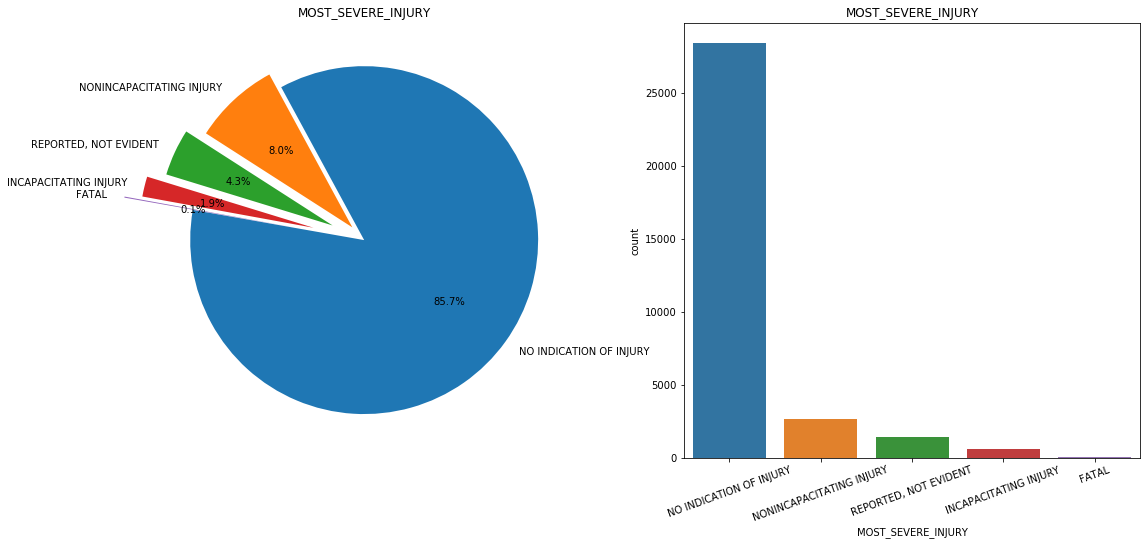

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_crashes['MOST_SEVERE_INJURY'].value_counts().plot.pie(explode=[0,0.1,0.2,0.3,0.4],
                                                         autopct='%1.1f%%',
                                                         startangle =170,
                                                         ax=ax[0],
                                                         shadow=False)
ax[0].set_title('MOST_SEVERE_INJURY')
ax[0].set_ylabel('')
sns.countplot(x='MOST_SEVERE_INJURY',data=df_crashes,ax=ax[1])
ax[1].set_title('MOST_SEVERE_INJURY')
plt.xticks(rotation=20)
plt.show()

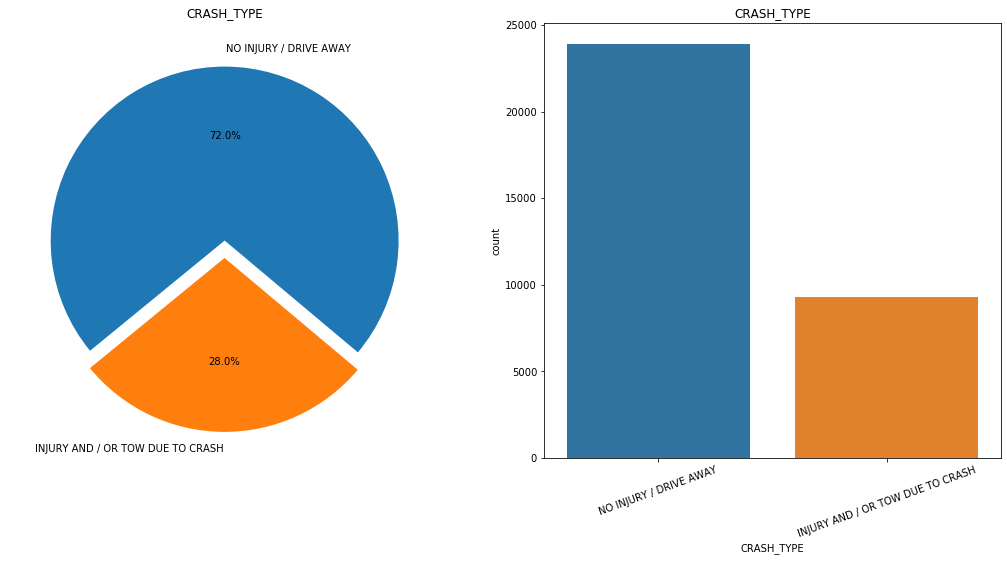

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_crashes['CRASH_TYPE'].value_counts().plot.pie(explode=[0,0.1],
                                                         autopct='%1.1f%%',
                                                         startangle =320,
                                                         ax=ax[0],
                                                         shadow=False)
ax[0].set_title('CRASH_TYPE')
ax[0].set_ylabel('')
sns.countplot(x='CRASH_TYPE',data=df_crashes,ax=ax[1])
ax[1].set_title('CRASH_TYPE')
plt.xticks(rotation=20)
plt.show()

In [12]:
chicago_map = folium.Map(location=[41.864073,-87.706819], zoom_start=10.5)
# convert to (n, 2) nd-array format for heatmap
stationArr = df_crashes[['LATITUDE', 'LONGITUDE']].values

# plot heatmap
chicago_map.add_child(plugins.HeatMap(stationArr, radius=11))
chicago_map

In [11]:
# dropping NAN values for UNIT_TYPE
df_vehicle.dropna(subset=['UNIT_TYPE'],inplace=True)
df_vehicle.reset_index(drop=True,inplace=True)

# merging vehicle with Crash dataset
df = df_vehicle.groupby('CRASH_RECORD_ID')['UNIT_TYPE'].apply(','.join).reset_index()
df = df.merge(df_vehicle.groupby('CRASH_RECORD_ID')[['MAKE','VEHICLE_YEAR','VEHICLE_TYPE','VEHICLE_USE',
                                                     'TRAVEL_DIRECTION','MANEUVER','OCCUPANT_CNT',
                                                     'FIRST_CONTACT_POINT']].first().reset_index(),how='left',
                                                    on='CRASH_RECORD_ID')

df_new = df_crashes.merge(df, how='left',on='CRASH_RECORD_ID')

# parsing time
df_new["CRASH_DATE"]=pd.to_datetime(df_new["CRASH_DATE"])

In [1]:
# forming data for time analysis using heatmap in folium across months
lat_long_list = []
for yr in range(df_new["CRASH_DATE"].min().year,df_new["CRASH_DATE"].max().year):
    for i in range(1,13):
        lat_long_list.append(df_new[(df_new["CRASH_DATE"].dt.year==yr) & (df_new["CRASH_MONTH"]==i)][["LATITUDE","LONGITUDE"]].values.tolist())

# loading heatmap with time plugin in folium
chicago_new_map = folium.Map(location=[41.864073,-87.706819], zoom_start=11)
plugins.HeatMapWithTime(lat_long_list,radius=8,auto_play=True,position='bottomright').add_to(chicago_new_map)
chicago_new_map

NameError: name 'df_new' is not defined

In [2]:
# forming data for time analysis using heatmap in folium across time of day
lat_long_list = []
for i in range(0,24):
    lat_long_list.append(df_new[(df_new["CRASH_HOUR"]==i)][["LATITUDE","LONGITUDE"]].values.tolist())
    
# loading heatmap with time plugin in folium
chicago_new_map = folium.Map(location=[41.864073,-87.706819], zoom_start=11)
plugins.HeatMapWithTime(lat_long_list,radius=8,auto_play=True,position='bottomright').add_to(chicago_new_map)
chicago_new_map

NameError: name 'df_new' is not defined

In [14]:
#plt.xticks(rotation=30)
#sns.countplot('UNIT_TYPE',data=df_new[df_new["CRASH_TYPE"]=="INJURY AND / OR TOW DUE TO CRASH"])
#plt.title("UNITs involved in", fontsize=25, fontweight="bold")

Text(0.5, 1.0, 'Contact point of crash')

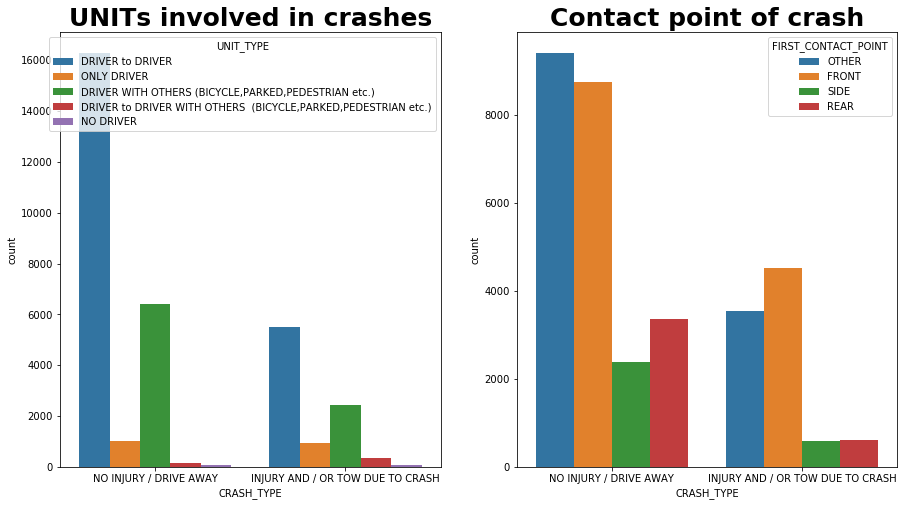

In [15]:
# regrouping objects involved in Accidents into more meaningful representation
def who_were(x):
    if (len(x)==1) and (x[0]=='DRIVER'):
        return "ONLY DRIVER"
    elif (x.count("DRIVER")>=2) and (len(set(x))==1):
        return "DRIVER to DRIVER"
    elif x.count("DRIVER")>=2 and len(set(x))>1:
        return "DRIVER to DRIVER WITH OTHERS  (BICYCLE,PARKED,PEDESTRIAN etc.)"
    elif x.count("DRIVER")==1 and len(x)>1:
        return "DRIVER WITH OTHERS (BICYCLE,PARKED,PEDESTRIAN etc.)"
    else:
        return "NO DRIVER"
        
df_new['UNIT_TYPE'] = df_new['UNIT_TYPE'].apply(lambda x: who_were(x.split(',')))

# regrouping contact point into same categories
def contact_point(x):
    if "FRONT" in x:
        return "FRONT"
    elif "SIDE" in x:
        return "SIDE"
    elif "REAR" in x:
        return "REAR"
    else:
        return "OTHER"
    
# replacing NA values with OTHER
df_new["FIRST_CONTACT_POINT"].fillna("OTHER",inplace=True)
df_new["FIRST_CONTACT_POINT"] = df_new["FIRST_CONTACT_POINT"].apply(lambda x: contact_point(x))


plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.xticks(rotation=0)
sns.countplot(x='CRASH_TYPE',data=df_new,hue='UNIT_TYPE')
plt.title("UNITs involved in crashes", fontsize=25, fontweight="bold")

plt.subplot(1, 2, 2)
plt.xticks(rotation=0)
sns.countplot(x='CRASH_TYPE',data=df_new,hue='FIRST_CONTACT_POINT')
plt.title("Contact point of crash", fontsize=25, fontweight="bold")

Text(0.5, 1.0, 'Car speed in FATAL Crash')

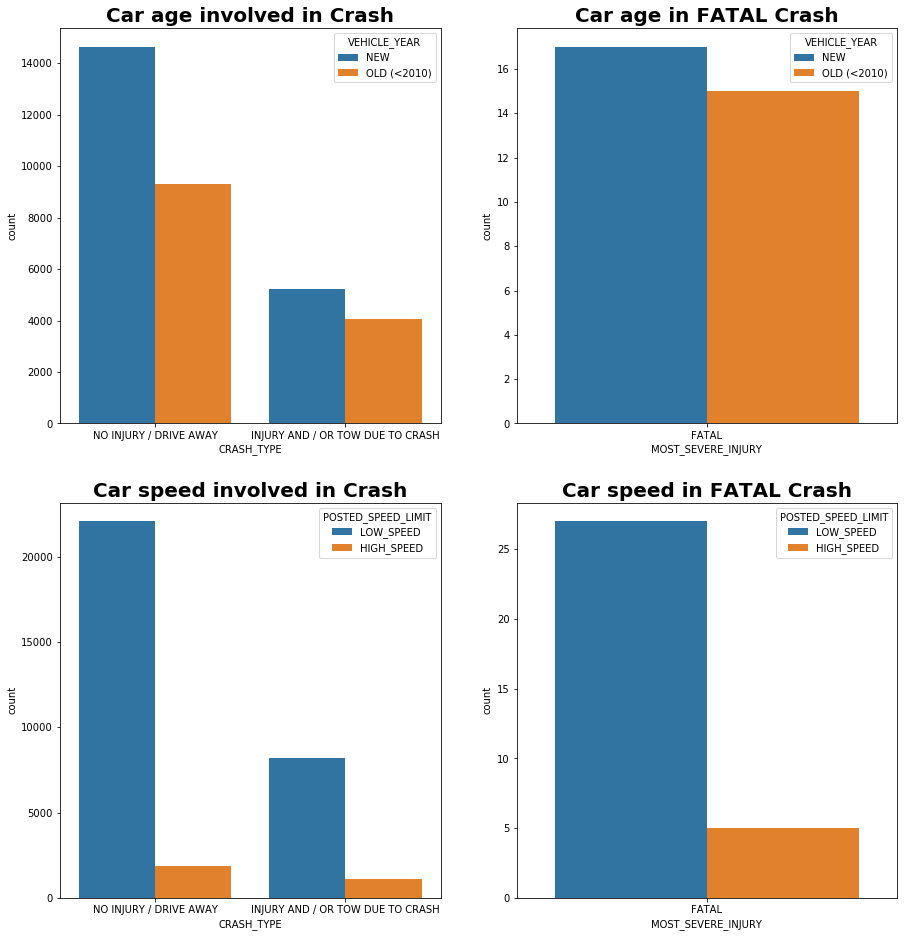

In [16]:
# merging same type of Maneuver in one
df_new["MANEUVER"].fillna("UNKNOWN/NA",inplace=True)
df_new["MANEUVER"] = df_new["MANEUVER"].apply(lambda x: "TURN" if "TURN" in x else("LANE" if any(s in x for s in ["LANE","OVER","ENTER"]) else x))
df_new["MANEUVER"] = df_new["MANEUVER"].apply(lambda x: "OTHER" if all(s not in x for s in ["AHEAD","TURN","UNKNOWN","LANE","BACKING"]) else x)

# converting VEHICLE_YEAR into new category of OLD or NEW
df_new["VEHICLE_YEAR"]= df_new["VEHICLE_YEAR"].apply(lambda x: "OLD (<2010)" if x <2010 else "NEW")

# converting POSTED_SPEED_LIMIT into new category of LOW SPEED or HIGH SPEED
df_new["POSTED_SPEED_LIMIT"]=df_new["POSTED_SPEED_LIMIT"].apply(lambda x: "LOW_SPEED" if x<=30 else "HIGH_SPEED")


#plotting graph
plt.figure(figsize=(15,16))
plt.subplot(2, 2, 1)
plt.xticks(rotation=0)
sns.countplot(x='CRASH_TYPE',data=df_new,hue='VEHICLE_YEAR')
plt.title("Car age involved in Crash", fontsize=20, fontweight="bold")

plt.subplot(2, 2, 2)
plt.xticks(rotation=0)
sns.countplot(x='MOST_SEVERE_INJURY',data=df_new[df_new["MOST_SEVERE_INJURY"]=="FATAL"],hue='VEHICLE_YEAR',hue_order= ['NEW', 'OLD (<2010)'])
plt.title("Car age in FATAL Crash", fontsize=20, fontweight="bold")

plt.subplot(2, 2, 3)
plt.xticks(rotation=0)
sns.countplot(x='CRASH_TYPE',data=df_new,hue='POSTED_SPEED_LIMIT')
plt.title("Car speed involved in Crash", fontsize=20, fontweight="bold")

plt.subplot(2, 2, 4)
plt.xticks(rotation=0)
sns.countplot(x='MOST_SEVERE_INJURY',data=df_new[df_new["MOST_SEVERE_INJURY"]=="FATAL"],hue='POSTED_SPEED_LIMIT')
plt.title("Car speed in FATAL Crash", fontsize=20, fontweight="bold")

In [17]:
#plt.subplot(2, 2, 1)
#plt.xticks(rotation=0)
#sns.countplot(x='CRASH_TYPE',data=df_new,hue='MANEUVER')
#plt.title("Vehicle Maneuver involved in Crash", fontsize=20, fontweight="bold")

#plt.subplot(2, 2, 2)
#plt.xticks(rotation=0)
#sns.countplot(x='MOST_SEVERE_INJURY',data=df_new[df_new["MOST_SEVERE_INJURY"]=="FATAL"],hue='MANEUVER')
#plt.title("Vehicle Maneuver in FATAL Crash", fontsize=20, fontweight="bold")

In [18]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#sns.countplot('MAKE',data=df_new,hue='CRASH_TYPE',order = df_new['MAKE'].value_counts().iloc[:6].index)

In [19]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#sns.countplot('VEHICLE_USE',data=df_new,hue='MOST_SEVERE_INJURY',order = df_new['VEHICLE_USE'].value_counts().iloc[:10].index)

In [20]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#sns.countplot('PRIM_CONTRIBUTORY_CAUSE',data=df_new,hue='CRASH_TYPE',order = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().iloc[:10].index)

In [21]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#sns.countplot('STREET_DIRECTION',data=df_new,order = df_new['STREET_DIRECTION'].value_counts().iloc[:10].index)

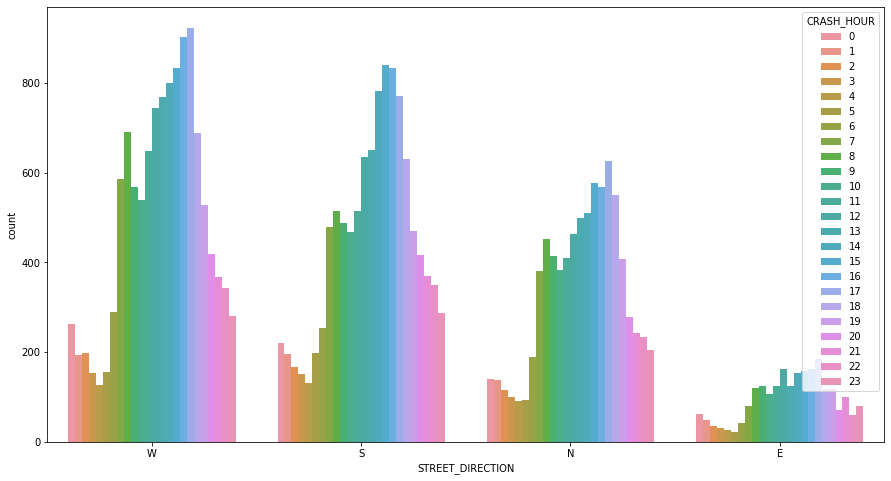

In [22]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=0)
sns.countplot(x='STREET_DIRECTION',hue='CRASH_HOUR',data=df_new,order = df_new['STREET_DIRECTION'].value_counts().iloc[:10].index)

In [23]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#sns.countplot('FIRST_CRASH_TYPE',hue='CRASH_TYPE',data=df_new,order = df_new['FIRST_CRASH_TYPE'].value_counts().iloc[:10].index)

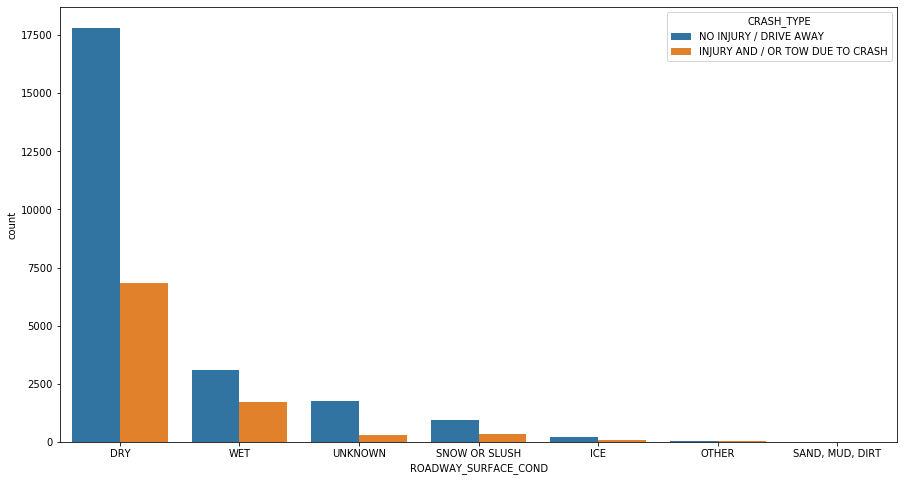

In [24]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=0)
sns.countplot(x='ROADWAY_SURFACE_COND',hue='CRASH_TYPE',data=df_new,order = df_new['ROADWAY_SURFACE_COND'].value_counts().iloc[:10].index)

In [25]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#sns.countplot('CRASH_MONTH',hue='CRASH_TYPE',data=df_new,order = df_new['CRASH_MONTH'].value_counts().iloc[:10].index)

In [26]:
#plt.figure(figsize=(15,8))
#plt.xticks(rotation=90)
#sns.countplot(df_new['CRASH_DATE'].dt.year,hue='CRASH_TYPE',data=df_new)

Text(0.5, 1.0, 'Drivers in FATAL Crash')

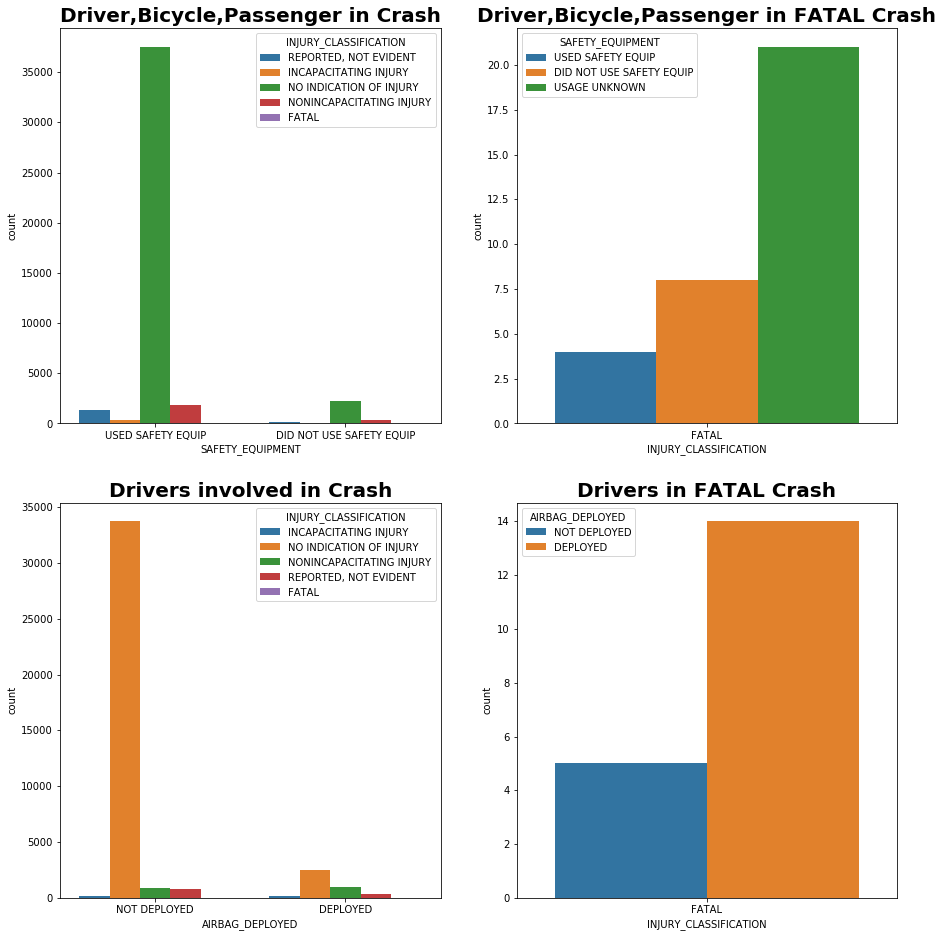

In [27]:
# grouping the SAFETY_EQUIPMENT used as SAFE and UNSAFE
def equip_used(x):
    if ("USED" in x) or ("HELMET" in x) or ("NONE PRESENT" in x):
        if any(s in x for s in ["NOT","IMPROPER","NONE PRESENT"]):
            return "DID NOT USE SAFETY EQUIP"
        else:
            return "USED SAFETY EQUIP"
    else:
        return x

# replacing NA with USAGE UNKNOWN before grouping them
df_people["SAFETY_EQUIPMENT"].fillna("USAGE UNKNOWN", inplace=True)
df_people["SAFETY_EQUIPMENT"]= df_people["SAFETY_EQUIPMENT"].apply(lambda x: equip_used(x))


# grouping the AIRBAG_DEPLOYED used as DEPLOYED and NOT DEPLOYED
def airbag(x):
    if ("DEPLOY" in x) and ("UNKNOWN" not in x):
        if "NOT" in x:
            return "NOT DEPLOYED"
        else:
            return "DEPLOYED"
    else:
        return x
 
# replacing NA with DEPLOYMENT UNKNOWN before grouping them
df_people["AIRBAG_DEPLOYED"].fillna("DEPLOYMENT UNKNOWN", inplace=True)
df_people["AIRBAG_DEPLOYED"]= df_people["AIRBAG_DEPLOYED"].apply(lambda x: airbag(x))


plt.figure(figsize=(15,16))

plt.subplot(2, 2, 1)
plt.xticks(rotation=0)
df_filter_people = df_people[(df_people["PERSON_TYPE"].isin(["DRIVER","BICYCLE","PASSENGER"])) & 
                             (df_people["SAFETY_EQUIPMENT"].isin(["USED SAFETY EQUIP","DID NOT USE SAFETY EQUIP"]))]
sns.countplot(x='SAFETY_EQUIPMENT',hue='INJURY_CLASSIFICATION',data=df_filter_people)
plt.title("Driver,Bicycle,Passenger in Crash", fontsize=20, fontweight="bold")

plt.subplot(2, 2, 2)
plt.xticks(rotation=0)
df_filter_people = df_people[(df_people["PERSON_TYPE"].isin(["DRIVER","BICYCLE","PASSENGER"])) & 
                             (df_people["INJURY_CLASSIFICATION"].isin(['FATAL']))]
sns.countplot(x='INJURY_CLASSIFICATION',hue='SAFETY_EQUIPMENT',data=df_filter_people)
plt.title("Driver,Bicycle,Passenger in FATAL Crash", fontsize=20, fontweight="bold")

plt.subplot(2, 2, 3)
plt.xticks(rotation=0)
df_filter_people = df_people[(df_people["PERSON_TYPE"].isin(["DRIVER"])) &
                            (df_people["AIRBAG_DEPLOYED"].isin(["DEPLOYED","NOT DEPLOYED"]))]
sns.countplot(x='AIRBAG_DEPLOYED',hue='INJURY_CLASSIFICATION',data=df_filter_people)
plt.title("Drivers involved in Crash", fontsize=20, fontweight="bold")

plt.subplot(2, 2, 4)
plt.xticks(rotation=0)
df_filter_people = df_people[(df_people["PERSON_TYPE"].isin(["DRIVER"])) &
                            (df_people["AIRBAG_DEPLOYED"].isin(["DEPLOYED","NOT DEPLOYED"])) & 
                             (df_people["INJURY_CLASSIFICATION"].isin(['FATAL']))]
sns.countplot(x='INJURY_CLASSIFICATION',hue='AIRBAG_DEPLOYED',data=df_filter_people)
plt.title("Drivers in FATAL Crash", fontsize=20, fontweight="bold")